In [1]:
!pip install pandas numpy scikit-learn torch joblib pyttsx3 speechrecognition pyaudio

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pyttsx3
import speech_recognition as sr

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

In [5]:
train_df = pd.read_csv("hm7-Train-2024.csv")
test_df = pd.read_csv("hm7-Test-2024.csv")
print(train_df.shape)
display(train_df.head())
print(test_df.shape)
display(test_df.head())

(57855, 47)


,patientID,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,readmitted
0,5306,Caucasian,Female,[0-10),6,25,1,1.0,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,0
1,55748,Caucasian,Female,[10-20),1,1,7,3.0,NaN,NaN,...,No,No,Up,No,No,No,No,No,Yes,1
2,66495,AfricanAmerican,Female,[20-30),1,1,7,2.0,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,0
3,51933,Caucasian,Male,[30-40),1,1,7,2.0,NaN,NaN,...,No,No,Up,No,No,No,No,No,Yes,0
4,40028,Caucasian,Male,[40-50),1,1,7,1.0,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Yes,0


(38571, 46)


,patientID,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,payer_code,medical_specialty,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed
0,58530.0,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,NaN,NaN,...,No,No,No,Steady,No,No,No,No,No,Yes
1,20502.0,Caucasian,Male,[70-80),1.0,1.0,7.0,5.0,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
2,47597.0,Caucasian,Female,[80-90),2.0,1.0,4.0,13.0,NaN,NaN,...,No,No,No,Steady,No,No,No,No,No,Yes
3,67998.0,AfricanAmerican,Female,[40-50),1.0,1.0,7.0,9.0,NaN,NaN,...,No,No,No,Steady,No,No,No,No,No,Yes
4,15586.0,AfricanAmerican,Male,[60-70),2.0,1.0,4.0,7.0,NaN,NaN,...,No,No,No,Steady,No,No,No,No,No,Yes


In [6]:
train_df['is_train'] = 1
test_df['is_train'] = 0
test_df['readmitted'] = np.nan
display(train_df.head())
display(test_df.head())

,patientID,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,readmitted,is_train
0,5306,Caucasian,Female,[0-10),6,25,1,1.0,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,0,1
1,55748,Caucasian,Female,[10-20),1,1,7,3.0,NaN,NaN,...,No,Up,No,No,No,No,No,Yes,1,1
2,66495,AfricanAmerican,Female,[20-30),1,1,7,2.0,NaN,NaN,...,No,No,No,No,No,No,No,Yes,0,1
3,51933,Caucasian,Male,[30-40),1,1,7,2.0,NaN,NaN,...,No,Up,No,No,No,No,No,Yes,0,1
4,40028,Caucasian,Male,[40-50),1,1,7,1.0,NaN,NaN,...,No,Steady,No,No,No,No,No,Yes,0,1


,patientID,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,is_train,readmitted
0,58530.0,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,NaN,NaN,...,No,Steady,No,No,No,No,No,Yes,0,NaN
1,20502.0,Caucasian,Male,[70-80),1.0,1.0,7.0,5.0,NaN,NaN,...,No,No,No,No,No,No,No,Yes,0,NaN
2,47597.0,Caucasian,Female,[80-90),2.0,1.0,4.0,13.0,NaN,NaN,...,No,Steady,No,No,No,No,No,Yes,0,NaN
3,67998.0,AfricanAmerican,Female,[40-50),1.0,1.0,7.0,9.0,NaN,NaN,...,No,Steady,No,No,No,No,No,Yes,0,NaN
4,15586.0,AfricanAmerican,Male,[60-70),2.0,1.0,4.0,7.0,NaN,NaN,...,No,Steady,No,No,No,No,No,Yes,0,NaN


In [8]:
full_df = pd.concat([train_df, test_df], ignore_index=True)
if 'patientID' in full_df.columns:
    full_df.drop(columns=["patientID"], inplace=True)
if full_df['readmitted'].isnull().sum() > 0:
    readmitted_mode = full_df.loc[full_df['is_train'] == 1, 'readmitted'].mode()[0]
    full_df['readmitted'] = full_df['readmitted'].fillna(readmitted_mode)
full_df['readmitted'] = full_df['readmitted'].astype(int)
print(full_df.shape)
full_df.head()

(96426, 47)


,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,payer_code,medical_specialty,indicator_level,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,readmitted,is_train
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,NaN,Pediatrics-Endocrinology,52.58,...,No,No,No,No,No,No,No,No,0,1
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,NaN,NaN,62.77,...,No,Up,No,No,No,No,No,Yes,1,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,NaN,NaN,30.24,...,No,No,No,No,No,No,No,Yes,0,1
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,NaN,NaN,54.07,...,No,Up,No,No,No,No,No,Yes,0,1
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,NaN,NaN,48.93,...,No,Steady,No,No,No,No,No,Yes,0,1


In [9]:
numeric_cols = full_df.select_dtypes(include=['float64','int64']).columns.tolist()
numeric_cols.remove("readmitted")
numeric_cols.remove("is_train")
numeric_cols

['admission_type',
 'discharge_disposition',
 'admission_source',
 'time_in_hospital',
 'indicator_level',
 'indicator_2_level',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [10]:
full_df[numeric_cols] = full_df[numeric_cols].interpolate(limit_direction="forward")
imputer = SimpleImputer(strategy="median")
full_df[numeric_cols] = imputer.fit_transform(full_df[numeric_cols])
full_df.head()

,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,payer_code,medical_specialty,indicator_level,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,readmitted,is_train
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,NaN,Pediatrics-Endocrinology,52.58,...,No,No,No,No,No,No,No,No,0,1
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,NaN,NaN,62.77,...,No,Up,No,No,No,No,No,Yes,1,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,NaN,NaN,30.24,...,No,No,No,No,No,No,No,Yes,0,1
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,NaN,NaN,54.07,...,No,Up,No,No,No,No,No,Yes,0,1
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,NaN,NaN,48.93,...,No,Steady,No,No,No,No,No,Yes,0,1


In [11]:
cat_cols = full_df.select_dtypes(include="object").columns.tolist()
full_df[cat_cols] = full_df[cat_cols].fillna("Unknown")
label_encoders = {col:LabelEncoder().fit(full_df[col]) for col in cat_cols}
for col, le in label_encoders.items():
    full_df[col] = le.transform(full_df[col])
scaler = StandardScaler()
full_df[numeric_cols] = scaler.fit_transform(full_df[numeric_cols])
print(full_df.shape)
full_df.head()

(96426, 47)


,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,payer_code,medical_specialty,indicator_level,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,readmitted,is_train
0,2,0,1,2.708005,4.881347,-1.162011,-1.135746,0,37,0.089855,...,0,1,1,0,0,0,0,0,0,1
1,2,0,2,-0.712375,-0.454242,0.298660,-0.459148,0,71,0.429585,...,0,4,1,0,0,0,0,2,1,1
2,0,0,3,-0.712375,-0.454242,0.298660,-0.797447,0,71,-0.654951,...,0,1,1,0,0,0,0,2,0,1
3,2,1,4,-0.712375,-0.454242,0.298660,-0.797447,0,71,0.139531,...,0,4,1,0,0,0,0,2,0,1
4,2,1,5,-0.712375,-0.454242,0.298660,-1.135746,0,71,-0.031835,...,0,2,1,0,0,0,0,2,0,1


In [12]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96426 entries, 0 to 96425
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      96426 non-null  int64  
 1   gender                    96426 non-null  int64  
 2   age                       96426 non-null  int64  
 3   admission_type            96426 non-null  float64
 4   discharge_disposition     96426 non-null  float64
 5   admission_source          96426 non-null  float64
 6   time_in_hospital          96426 non-null  float64
 7   payer_code                96426 non-null  int64  
 8   medical_specialty         96426 non-null  int64  
 9   indicator_level           96426 non-null  float64
 10  indicator_2_level         96426 non-null  float64
 11  num_lab_procedures        96426 non-null  float64
 12  num_procedures            96426 non-null  float64
 13  num_medications           96426 non-null  float64
 14  number

In [13]:
train_cleaned = full_df[full_df['is_train'] == 1].drop(columns=['is_train'])
X = train_cleaned.drop(columns=['readmitted'])
y = train_cleaned['readmitted']
X_train, X_val, y_train, y_val = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(46284, 45)
(11571, 45)
(46284,)
(11571,)


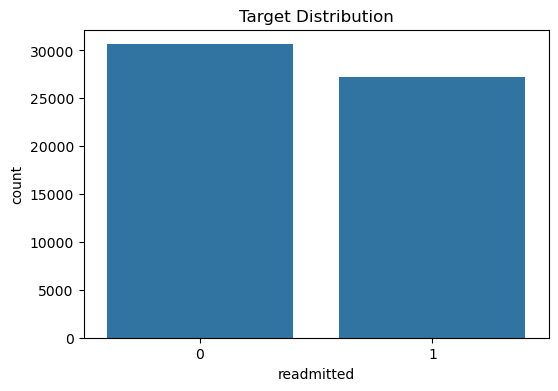

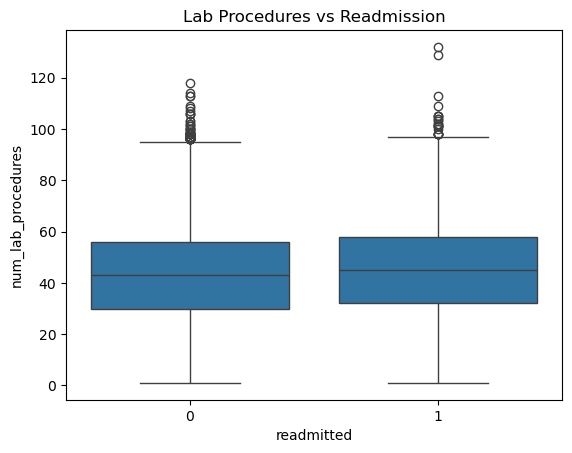

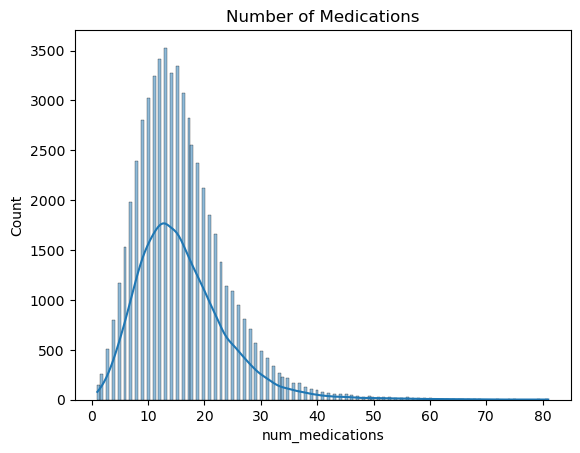

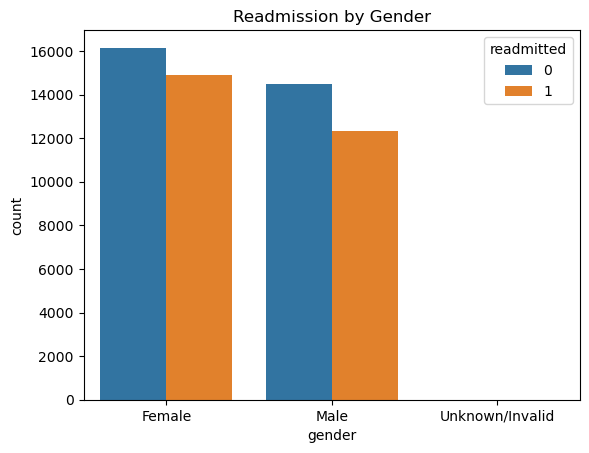

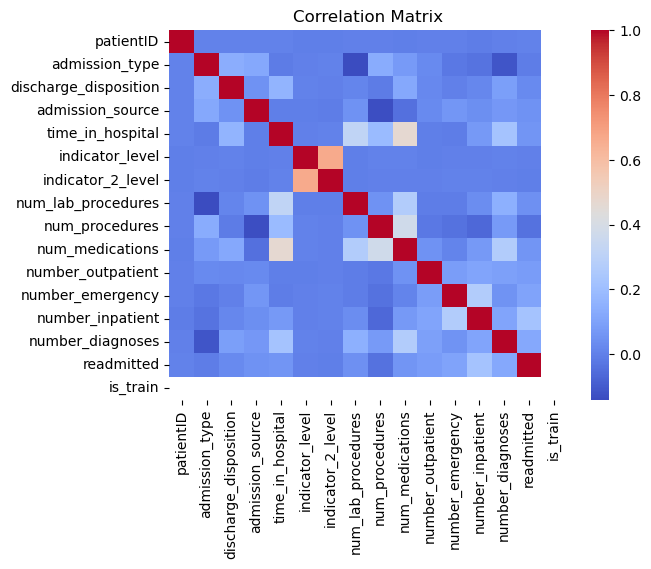

In [17]:
def plot_visuals(df):
    plt.figure(figsize=(6,4))
    sns.countplot(x='readmitted', data=df)
    plt.title('Target Distribution')
    plt.show()

    sns.boxplot(x='readmitted', y='num_lab_procedures', data=df)
    plt.title('Lab Procedures vs Readmission')
    plt.show()

    sns.histplot(df['num_medications'], kde=True)
    plt.title('Number of Medications')
    plt.show()

    sns.countplot(x='gender', hue='readmitted', data=df)
    plt.title('Readmission by Gender')
    plt.show()

    sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

plot_visuals(train_df)

In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}
model_scores = {}
for name, model in models.items():
    model.fit(X_train,y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val,preds)
    model_scores[name] = acc
    print(f"\n{name}")
    print(classification_report(y_val,preds))

C:\Users\saivi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
              precision    recall  f1-score   support

           0       0.60      0.78      0.68      6126
           1       0.63      0.43      0.51      5445

    accuracy                           0.61     11571
   macro avg       0.62      0.60      0.59     11571
weighted avg       0.62      0.61      0.60     11571


Random Forest
              precision    recall  f1-score   support

           0       0.63      0.71      0.67      6126
           1       0.62      0.53      0.57      5445

    accuracy                           0.63     11571
   macro avg       0.63      0.62      0.62     11571
weighted avg       0.63      0.63      0.62     11571


Gradient Boosting
              precision    recall  f1-score   support

           0       0.63      0.75      0.68      6126
           1       0.64      0.51      0.56      5445

    accuracy                           0.63     11571
   macro avg       0.63      0.63      0.62     11571
weighted avg       

In [20]:
class ReadmissionDataset(Dataset):
    def __init__(self,X,y):
        self.X = torch.tensor(X.values,dtype=torch.float32)
        self.y = torch.tensor(y.values,dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self,idx): return self.X[idx], self.y[idx]
train_dl = DataLoader(ReadmissionDataset(X_train,y_train),batch_size=64,shuffle=True)
val_dl = DataLoader(ReadmissionDataset(X_val,y_val),batch_size=64)

In [21]:
class SimpleNN(nn.Module):
    def __init__(self,input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim,64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64,2)
        )
    def forward(self,x): return self.model(x)

In [23]:
def train_model(model,train_dl,val_dl,epochs=10):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
    for epoch in range(epochs):
        model.train()
        for xb,yb in train_dl:
            optimizer.zero_grad()
            loss = loss_fn(model(xb),yb)
            loss.backward()
            optimizer.step()
    model.eval()
    correct, total = 0,0
    with torch.no_grad():
        for xb,yb in val_dl:
            pred = model(xb).argmax(dim=1)
            correct += (pred == yb).sum().item()
            total += yb.size(0)
    print(f"Validation Accuracy: {correct/total:.4f}")
for i in range(1,3):
    print(f"\nTraining SimpleNN-{i}")
    train_model(SimpleNN(X_train.shape[1]),train_dl,val_dl)


Training SimpleNN-1
Validation Accuracy: 0.6183

Training SimpleNN-2
Validation Accuracy: 0.6220


In [24]:
best_model_name = max(model_scores,key=model_scores.get)
print(f"\nBest performing ML model before tuning: {best_model_name}")
best_base_model = models[best_model_name]
if best_model_name == "Random Forest":
    param_grid = {"n_estimators": [100,200], "max_depth": [10,20]}
elif best_model_name == "Gradient Boosting":
    param_grid = {"n_estimators": [100,200], "learning_rate": [0.05,0.1]}
elif best_model_name == "Extra Trees":
    param_grid = {"n_estimators": [100,200], "max_depth": [10,20]}
elif best_model_name == "Logistic Regression":
    param_grid = {"C": [0.1,1.0,10.0]}
else:
    param_grid = {}
grid = GridSearchCV(best_base_model,param_grid,cv=3,scoring="accuracy")
grid.fit(X_train,y_train)
best_model = grid.best_estimator_
final_preds = best_model.predict(X_val)
print("\nBest Model Evaluation After Tuning")
print(classification_report(y_val,final_preds))


Best performing ML model before tuning: Gradient Boosting

Best Model Evaluation After Tuning
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      6126
           1       0.64      0.53      0.58      5445

    accuracy                           0.64     11571
   macro avg       0.64      0.63      0.63     11571
weighted avg       0.64      0.64      0.63     11571



In [25]:
joblib.dump(best_model,"final_model.pkl")
joblib.dump(scaler,"scaler.pkl")
joblib.dump(label_encoders,"label_encoders.pkl")
joblib.dump(X.columns.tolist(),"feature_names.pkl")

['feature_names.pkl']

In [26]:
def speak(text):
    engine = pyttsx3.init()
    engine.setProperty('rate',160)
    engine.say(text)
    engine.runAndWait()

In [27]:
def listen(prompt):
    r = sr.Recognizer()
    with sr.Microphone() as source:
        speak(prompt)
        print("Listening...")
        audio = r.listen(source)
    try:
        response = r.recognize_google(audio)
        print("You said:", response)
        return response
    except:
        speak("Sorry, I did not understand. Please repeat.")
        return listen(prompt)

In [28]:
def ai_voice_chatbot():
    speak("Welcome to the Hospital Readmission Predictor. Let's begin.")
    scaler = joblib.load("scaler.pkl")
    label_encoders = joblib.load("label_encoders.pkl")
    model = joblib.load("final_model.pkl")
    features = joblib.load("feature_names.pkl")
    input_data = []
    for col in features:
        if col in label_encoders:
            options = label_encoders[col].classes_
            while True:
                val = listen(f"Say value for {col}. Options: {', '.join(options)}")
                if val in options:
                    encoded = label_encoders[col].transform([val])[0]
                    input_data.append(encoded)
                    break
        else:
            while True:
                val = listen(f"Say numeric value for {col}.")
                try:
                    input_data.append(float(val))
                    break
                except:
                    speak("Please say a number.")
    numeric_indices = [i for i, col in enumerate(features) if col not in label_encoders]
    numeric_vals = np.array([input_data[i] for i in numeric_indices]).reshape(1, -1)
    scaled_vals = scaler.transform(numeric_vals).flatten()
    for i, idx in enumerate(numeric_indices):
        input_data[idx] = scaled_vals[i]
    prediction = model.predict([input_data])[0]
    speak("Prediction complete. Result: Likely to be readmitted." if prediction == 1 else "Not likely to be readmitted.")

In [ ]:
ai_voice_chatbot()